# Problem Statement:

Yulu, India's top micro-mobility service, faces revenue declines and has engaged a consulting firm to identify the factors impacting demand for shared electric cycles in the Indian market. The company seeks to understand the specific reasons behind the recent dip in revenues and determine key factors affecting customer demand. The analysis aims to uncover insights into user preferences, market dynamics, and potential areas for improvement in Yulu's offerings. The goal is to inform strategic decisions that will address the challenges and revive revenue growth in the Indian micro-mobility sector.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency,f_oneway


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike_sharing.csv")

In [3]:
data.shape

(10886, 12)

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Observation: Datetime is in object datatype. So need to convert into datetime datatype

### Covert date to datetme format

In [6]:
data["datetime"] = pd.to_datetime(data["datetime"])

### Missing values

In [7]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Observation: There is no missing value

In [8]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Finding outlier

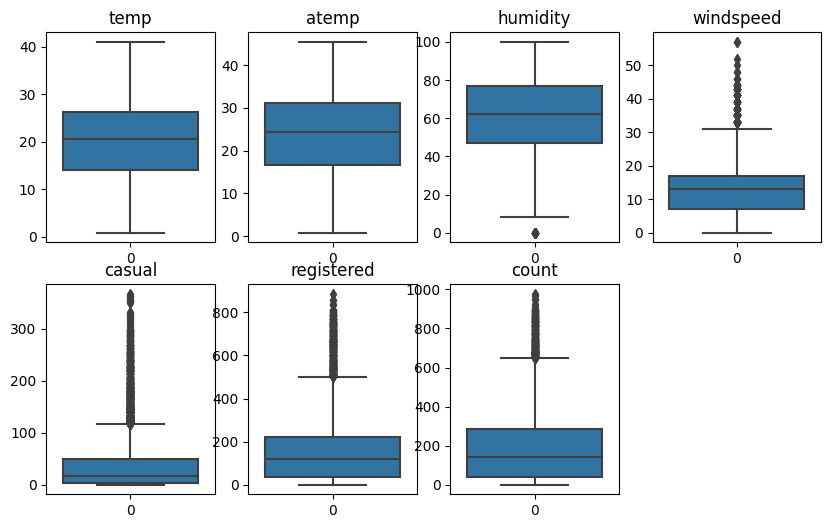

In [10]:
plt.figure(figsize=(10,6))
col = ['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for i,elem in enumerate(col):
  plt.subplot(2,4,i+1)
  sns.boxplot(data[elem])
  plt.title(elem)


Observation: we can find outlier in humidity, windspeed, casual, registered ride, count. Need to check whether it is really an outlier or due to some other factor the value increased

## Univariate Analysis

Distribution of vehicle Demand on each month, day, time

In [11]:
data["Year"] = data["datetime"].dt.year
data["Month"] = data["datetime"].dt.strftime("%B")
data["Day"] = data["datetime"].dt.strftime("%A")
data["Hour"] = data["datetime"].dt.hour

In [12]:
bins = [0,7,11,16,22,23]
label = ["Early_morning","Morning","Noon","Evening","Night"]
data["Day_parts"] = pd.cut(data["Hour"],bins=bins,labels=label,include_lowest=True)

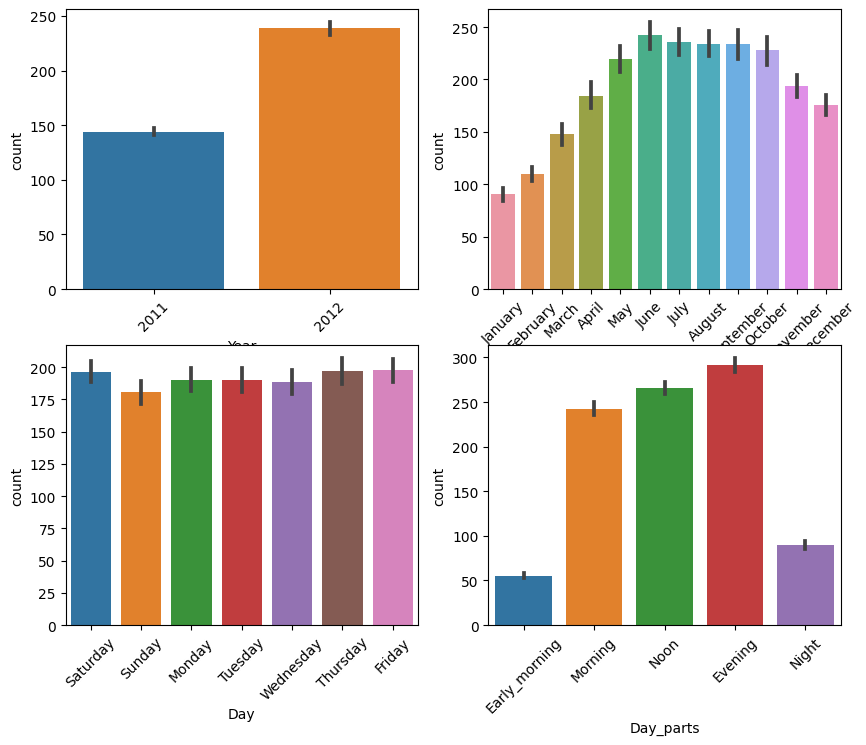

In [13]:
feature = ["Year","Month","Day","Day_parts"]
plt.figure(figsize=(10,8))
for i,elem in enumerate(feature):
  plt.subplot(2,2,i+1)
  ax = sns.barplot(data=data,x=elem,y="count")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Observation:

More yulu vehicle is moved in the
* year 2012
* June to October
* Monday to Saturday
* Evening 4 to 10pm


<ipython-input-14-a88150df510b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

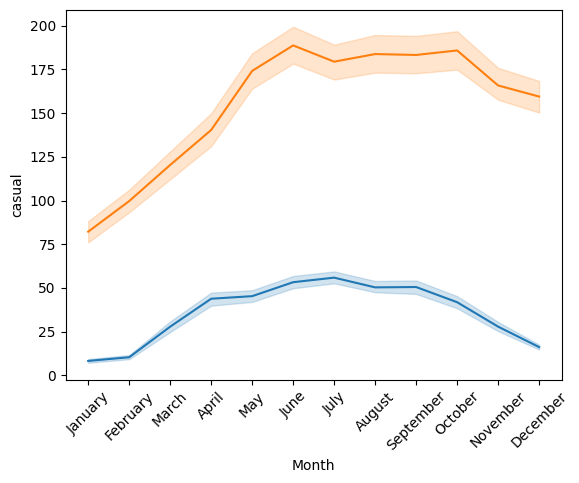

In [14]:
ax = sns.lineplot(data=data,x="Month",y="casual")
ax = sns.lineplot(data=data,x="Month",y="registered")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Observation:

Distribution of vehicle Demand on each season, holiday, working day. weather

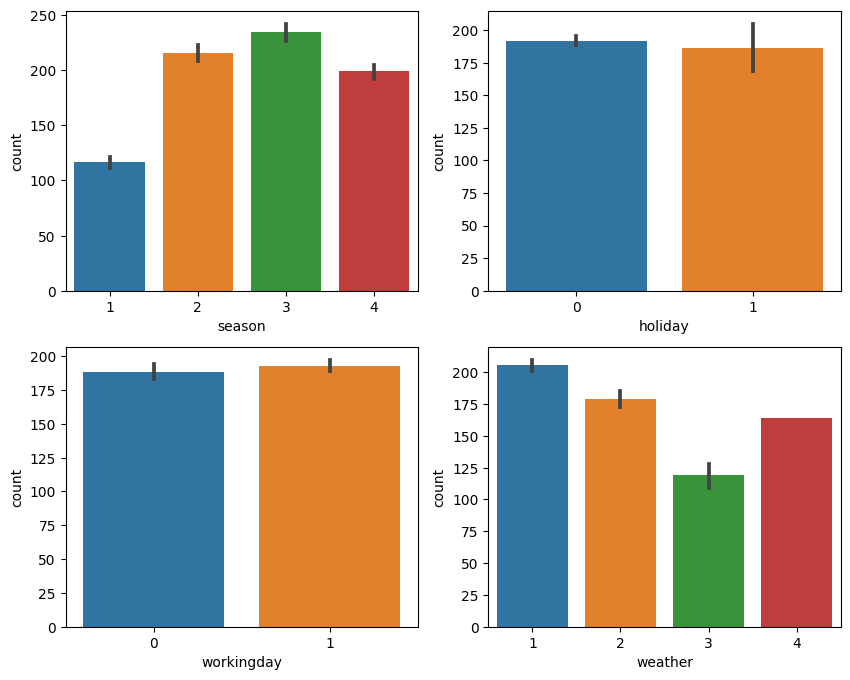

In [15]:
feature = ["season","holiday","workingday","weather"]
plt.figure(figsize=(10,8))
for i,elem in enumerate(feature):
  plt.subplot(2,2,i+1)
  ax = sns.barplot(data=data,x=elem,y="count")


Observation:

* More number of vehicles are used in summer, fall, winter
* Demand is equal on both govt holidays weenk end and working days
* More demands are on clear sky(1) than light and heavy rain(3,4). Need to check it

<Axes: xlabel='temp', ylabel='Count'>

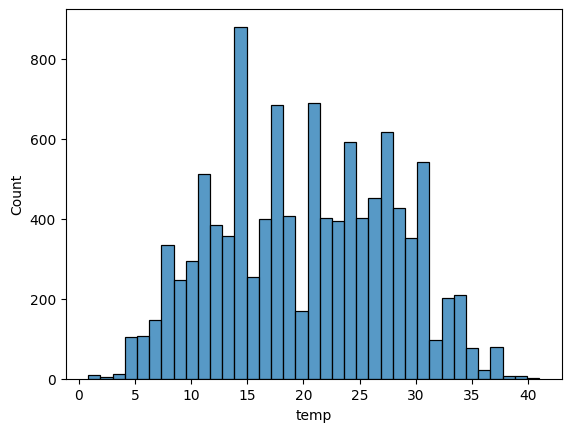

In [16]:
sns.histplot(data=data,x="temp")

In [17]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Day_parts
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0,Early_morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1,Early_morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2,Early_morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3,Early_morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4,Early_morning


# Bivariate Analysis

## Working day Vs Count of Bicycle

<Axes: xlabel='workingday', ylabel='count'>

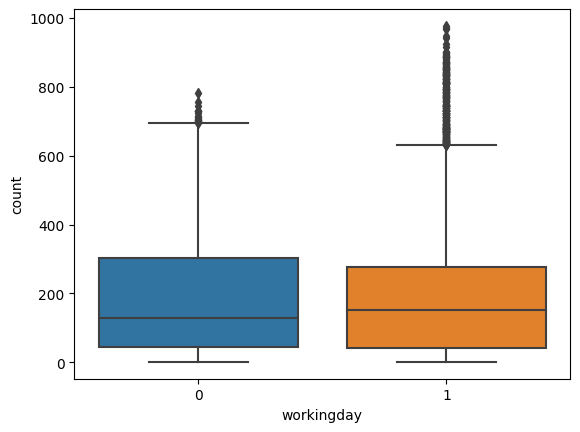

In [28]:
sns.boxplot(x="workingday",y="count",data=data)

Observation:

* Here we cant say that count of bicycle are more on working days, because the difference in median for working and non working days is not significant.So we have to do the hypothesis testing to check for population.

* Also we shouldnt remove the outlier for checking for population because working day count will be more than non working day.

## Weather Vs Count of Bicycle

<Axes: xlabel='weather', ylabel='count'>

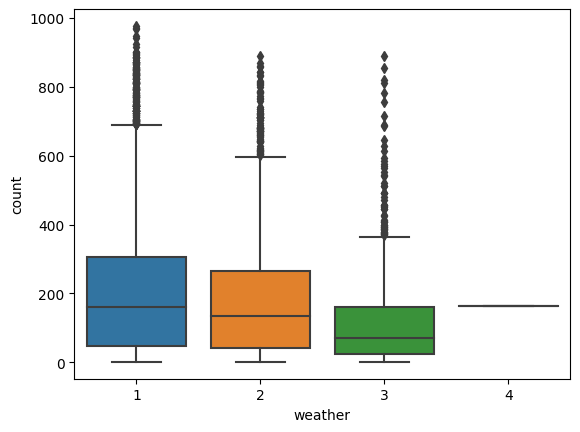

In [29]:
sns.boxplot(x="weather",y="count",data=data)

From the graph there is some effect on the count of bicycle due to weather

<Axes: xlabel='season', ylabel='count'>

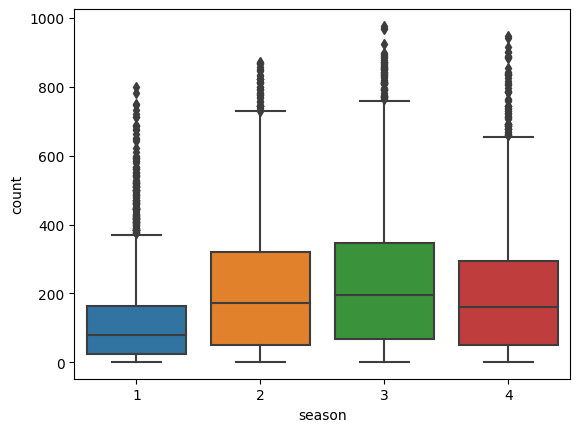

In [30]:
sns.boxplot(x="season",y="count",data=data)

<ipython-input-18-f4da6818e915>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap="Blues",annot=True)


<Axes: >

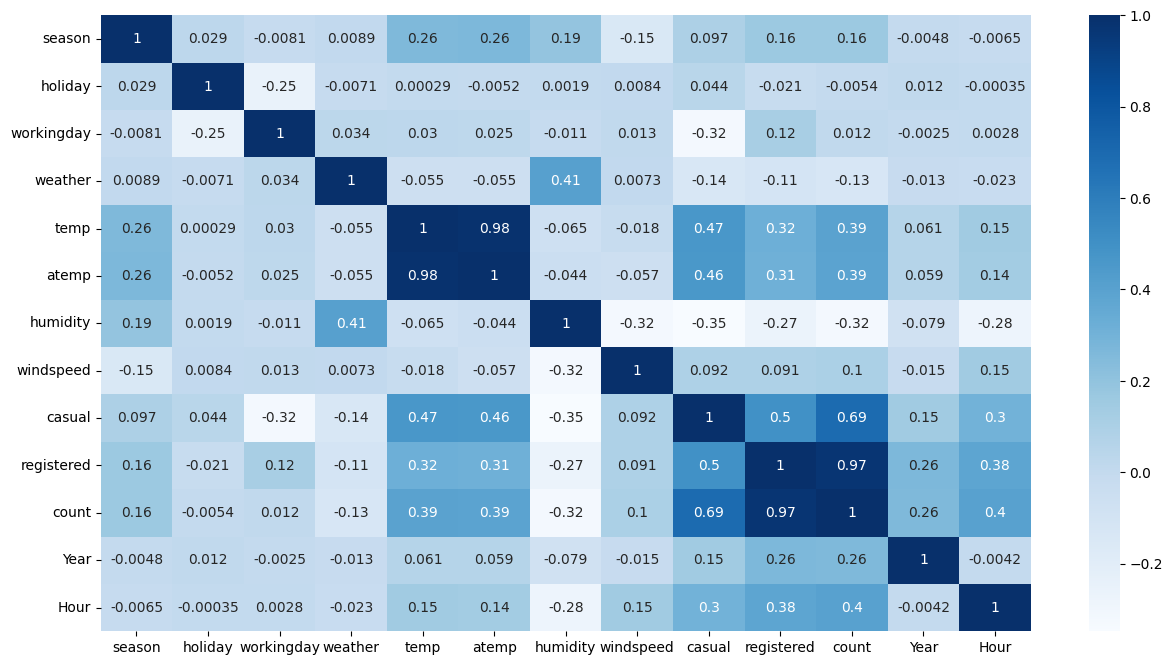

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="Blues",annot=True)

Observation:

In the above correlation graph, if the temperature increases, demand of the vehicle also increases

# Hypothesis Testing

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented





In [75]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [76]:
data.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


Since the count of both the group is different, we can take the sample to reduce bias

In [77]:
workingday_data = data[data["workingday"] == 1]["count"].sample(3400)
non_workingday_data = data[data["workingday"] == 0]["count"].sample(3400)

In [82]:
# Ho: The count of cycle on workingday and the count on non working day has no significant difference
# Ha: The count of cycle on workingday and the count on non working day has significant difference

t, p = ttest_ind(workingday_data,non_workingday_data,alternative ="greater",equal_var = False ) # by default equal_var is True
t,p

(0.9082714044912203, 0.1818835809433672)

In [83]:
alpha = 0.05
if p > alpha:
  print("Failed to Reject Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Failed to Reject Null Hypothesis


Observation:

Since p > alpha,accept null hypothesis and so it is concluded that the count of cycle on workingday and the count on non working day has no significant difference

## Annova test for weather

In [62]:
data.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [64]:
# Null Hypothesis (H0): The mean number of rented cycles is equal across all weather categories (no significant difference).
# Alternative Hypothesis (H1): At least one of the weather categories has a different mean number of rented cycles.


w1 = data[data["weather"]==1]["count"].sample(800)
w2 = data[data["weather"]==2]["count"].sample(800)
w3 = data[data["weather"]==3]["count"].sample(800)



Check for the assumption of Annova:

* Series is Normal - QQ plot, DISTplot, Shapiro Test
* All series should have equal variance - They dont have equal variance (describe, LEVENE test)

<ipython-input-67-1593fd99ad76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w1)


<Axes: xlabel='count', ylabel='Density'>

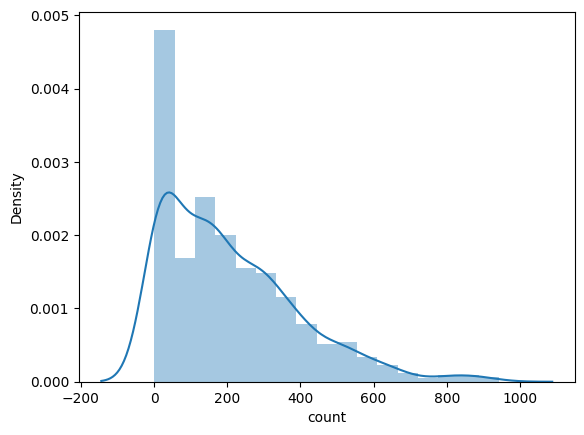

In [67]:
sns.distplot(w1)

<ipython-input-68-1c8e7f514b7b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w1))


<Axes: xlabel='count', ylabel='Density'>

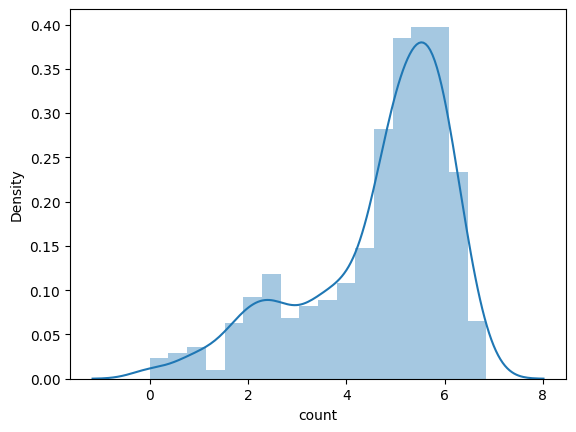

In [68]:
# It is right skewed
sns.distplot(np.log(w1))

We are not getting normal distribution for w1,w2,w3

In [71]:
# check with Shapiro test
# Ho: Series is not normal
#Ha: Series is normal distribution
from scipy.stats import shapiro
t,p = shapiro(w1)
t,p

(0.9011344909667969, 2.654816334559454e-22)

p<0.05-reject null hypothesis -- series is not normal distribution

Check for LEVENE test for equal variance

In [72]:
from scipy.stats import levene
t,p = levene(w1,w2,w3)
t,p

(39.349028907185854, 1.5327599693903907e-17)

p<0.05-reject null hypothesis -- variance are not equal



* Since both the assumptions for annova test are failed, can go for Kruskal Wallis test

* But even then the assumptions are failed, we can go for annova because sample mean is normally distributed, even the population is not according to the Central Limit theorem. So this will not affect much in the False Positive rate

## Annova test for weather

In [73]:
# Null Hypothesis (H0): The mean number of rented cycles is equal across all seasons (no significant difference).
# Alternative Hypothesis (H1): At least one of the seasons has a different mean number of rented cycles.

t,p = f_oneway(w1,w2,w3)
t,p

(58.92564621208473, 1.0426433730444333e-25)

Observation:


* Since p value is less than 0.05, reject null Hyothesis

* At least one of the weather categories has a different mean number of rented cycles. ie. count of bicycle is affected by weather

# Kruskal-Wallis H Test for weather

In [74]:
from scipy.stats import kruskal
stat, p = kruskal(w1,w2,w3)
stat,p

(123.24244355398578, 1.7307861614054207e-27)


Observation:

Since p value is less than 0.05, reject null Hyothesis

Same as Annova test count of bicycle is affected by weather

## Chi-square test to check if Weather is dependent on the season

In [25]:
# Null Hypothesis (H0): Weather and Season are independent of each other (no association between the two variables).
# Alternative Hypothesis (H1): Weather and Season are dependent (there is an association between the two variables).


contingency_table = pd.crosstab(data['weather'], data['season'])
chi2, p, _, _ = chi2_contingency(contingency_table)

Observation:


* Since p value is less than 0.05, reject null Hyothesis
* At least one of the seasons has a different mean number of rented cycles.

In [26]:
print("\nChi-square test for Independence:")
print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square test for Independence:
Chi-square statistic: 49.15865559689363
P-value: 1.5499250736864862e-07


Observation:


* Since p value is less than 0.05, reject null Hyothesis
* Weather and Season are dependent (there is an association between the two variables).
